# Modello SIS

Il modello SIS (Susceptible-Infected-Susceptible) è un modello epidemiologico utilizzato in network science per studiare la diffusione di malattie infettive in una popolazione.

In questo modello, ogni individuo nella popolazione può essere in uno di due stati: suscettibile (S) o infetto (I). Inizialmente, tutti gli individui sono suscettibili alla malattia. Gli individui infetti hanno una certa probabilità di trasmettere la malattia agli individui suscettibili con cui entrano in contatto.

Gli individui suscettibili che vengono infettati passano nello stato infetto e rimangono infetti per un certo periodo di tempo, dopodiché possono guarire e tornare nello stato suscettibile o rimanere infetti e continuare a trasmettere la malattia.

Il modello SIS assume che la probabilità di trasmissione della malattia dipenda dal numero di contatti che un individuo ha con individui infetti nella rete sociale. Inoltre, il modello assume che gli individui infetti possano guarire naturalmente con una certa probabilità, ma possono anche essere reinfectati in seguito.

Può avere senso fare un'analisi di questo tipo sulla rete aeroportuale?

Potenzialmente sì, dato che gli aeroporti sono importanti centri di collegamento si può andare a studiare quanto velocemente potrebbe espandersi un contagio attraverso di essi

In [14]:
%matplotlib inline
import networkx as nx
import gzip
import matplotlib.pyplot as plt
import random
G = nx.read_graphml('openflights_world.graphml.gz')

### Stato iniziale

Inizalmente ogni nodo è S

Poi si sceglierà un nodo da far diventare I

In [15]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state

initial_state(G)

{'GKA': 'S',
 'MAG': 'S',
 'HGU': 'S',
 'LAE': 'S',
 'POM': 'S',
 'WWK': 'S',
 'NME': 'S',
 'GOH': 'S',
 'SFJ': 'S',
 'THU': 'S',
 'AEY': 'S',
 'EGS': 'S',
 'IFJ': 'S',
 'KEF': 'S',
 'VIN': 'S',
 'RKV': 'S',
 'YAM': 'S',
 'YAY': 'S',
 'ZKG': 'S',
 'YBC': 'S',
 'YBG': 'S',
 'YBK': 'S',
 'YBL': 'S',
 'YBR': 'S',
 'YCB': 'S',
 'YCD': 'S',
 'YCG': 'S',
 'BCV': 'S',
 'YCL': 'S',
 'YCO': 'S',
 'YCY': 'S',
 'YZS': 'S',
 'HMB': 'S',
 'YDF': 'S',
 'JTC': 'S',
 'OIA': 'S',
 'YDQ': 'S',
 'YEG': 'S',
 'BYO': 'S',
 'SXO': 'S',
 'CFC': 'S',
 'YEV': 'S',
 'YFB': 'S',
 'YFC': 'S',
 'YFO': 'S',
 'YFS': 'S',
 'YGK': 'S',
 'YGL': 'S',
 'YGP': 'S',
 'OLC': 'S',
 'YGR': 'S',
 'IRZ': 'S',
 'YHD': 'S',
 'YHI': 'S',
 'YHK': 'S',
 'YHM': 'S',
 'YHU': 'S',
 'YHY': 'S',
 'YHZ': 'S',
 'GZP': 'S',
 'YIO': 'S',
 'YJT': 'S',
 'YKA': 'S',
 'YKF': 'S',
 'YKL': 'S',
 'YLL': 'S',
 'YLW': 'S',
 'YMM': 'S',
 'YMO': 'S',
 'YNA': 'S',
 'OBY': 'S',
 'YOJ': 'S',
 'YOW': 'S',
 'YPL': 'S',
 'YPN': 'S',
 'YPR': 'S',
 'YPY': 'S',

## Transizione di stato 
Il modello SIS prevede due parametri, 
- Beta -> è la probabilità di transizione da S a I dato un vicino infetto, e 
- mu -> è la probabilità di transizione da I a S.

In pseudocodice, l'algoritmo si presenta come segue:

- Per ogni nodo del grafo
    - Se il nodo ha lo stato I
        - Il nodo passa allo stato S con probabilità mu
    - Altrimenti il nodo ha lo stato S
        - Per ogni vicino del nodo
            - Se il vicino ha lo stato I
                - Il nodo passa allo stato I con probabilità beta

In [16]:
MU = 0.1
BETA = 0.1

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state

test_state = initial_state(G)
state_transition(G, test_state)

{'FRA': 'I',
 'BHX': 'I',
 'JER': 'S',
 'NCL': 'I',
 'DUB': 'I',
 'CDG': 'I',
 'ZRH': 'I'}

# Simulazione

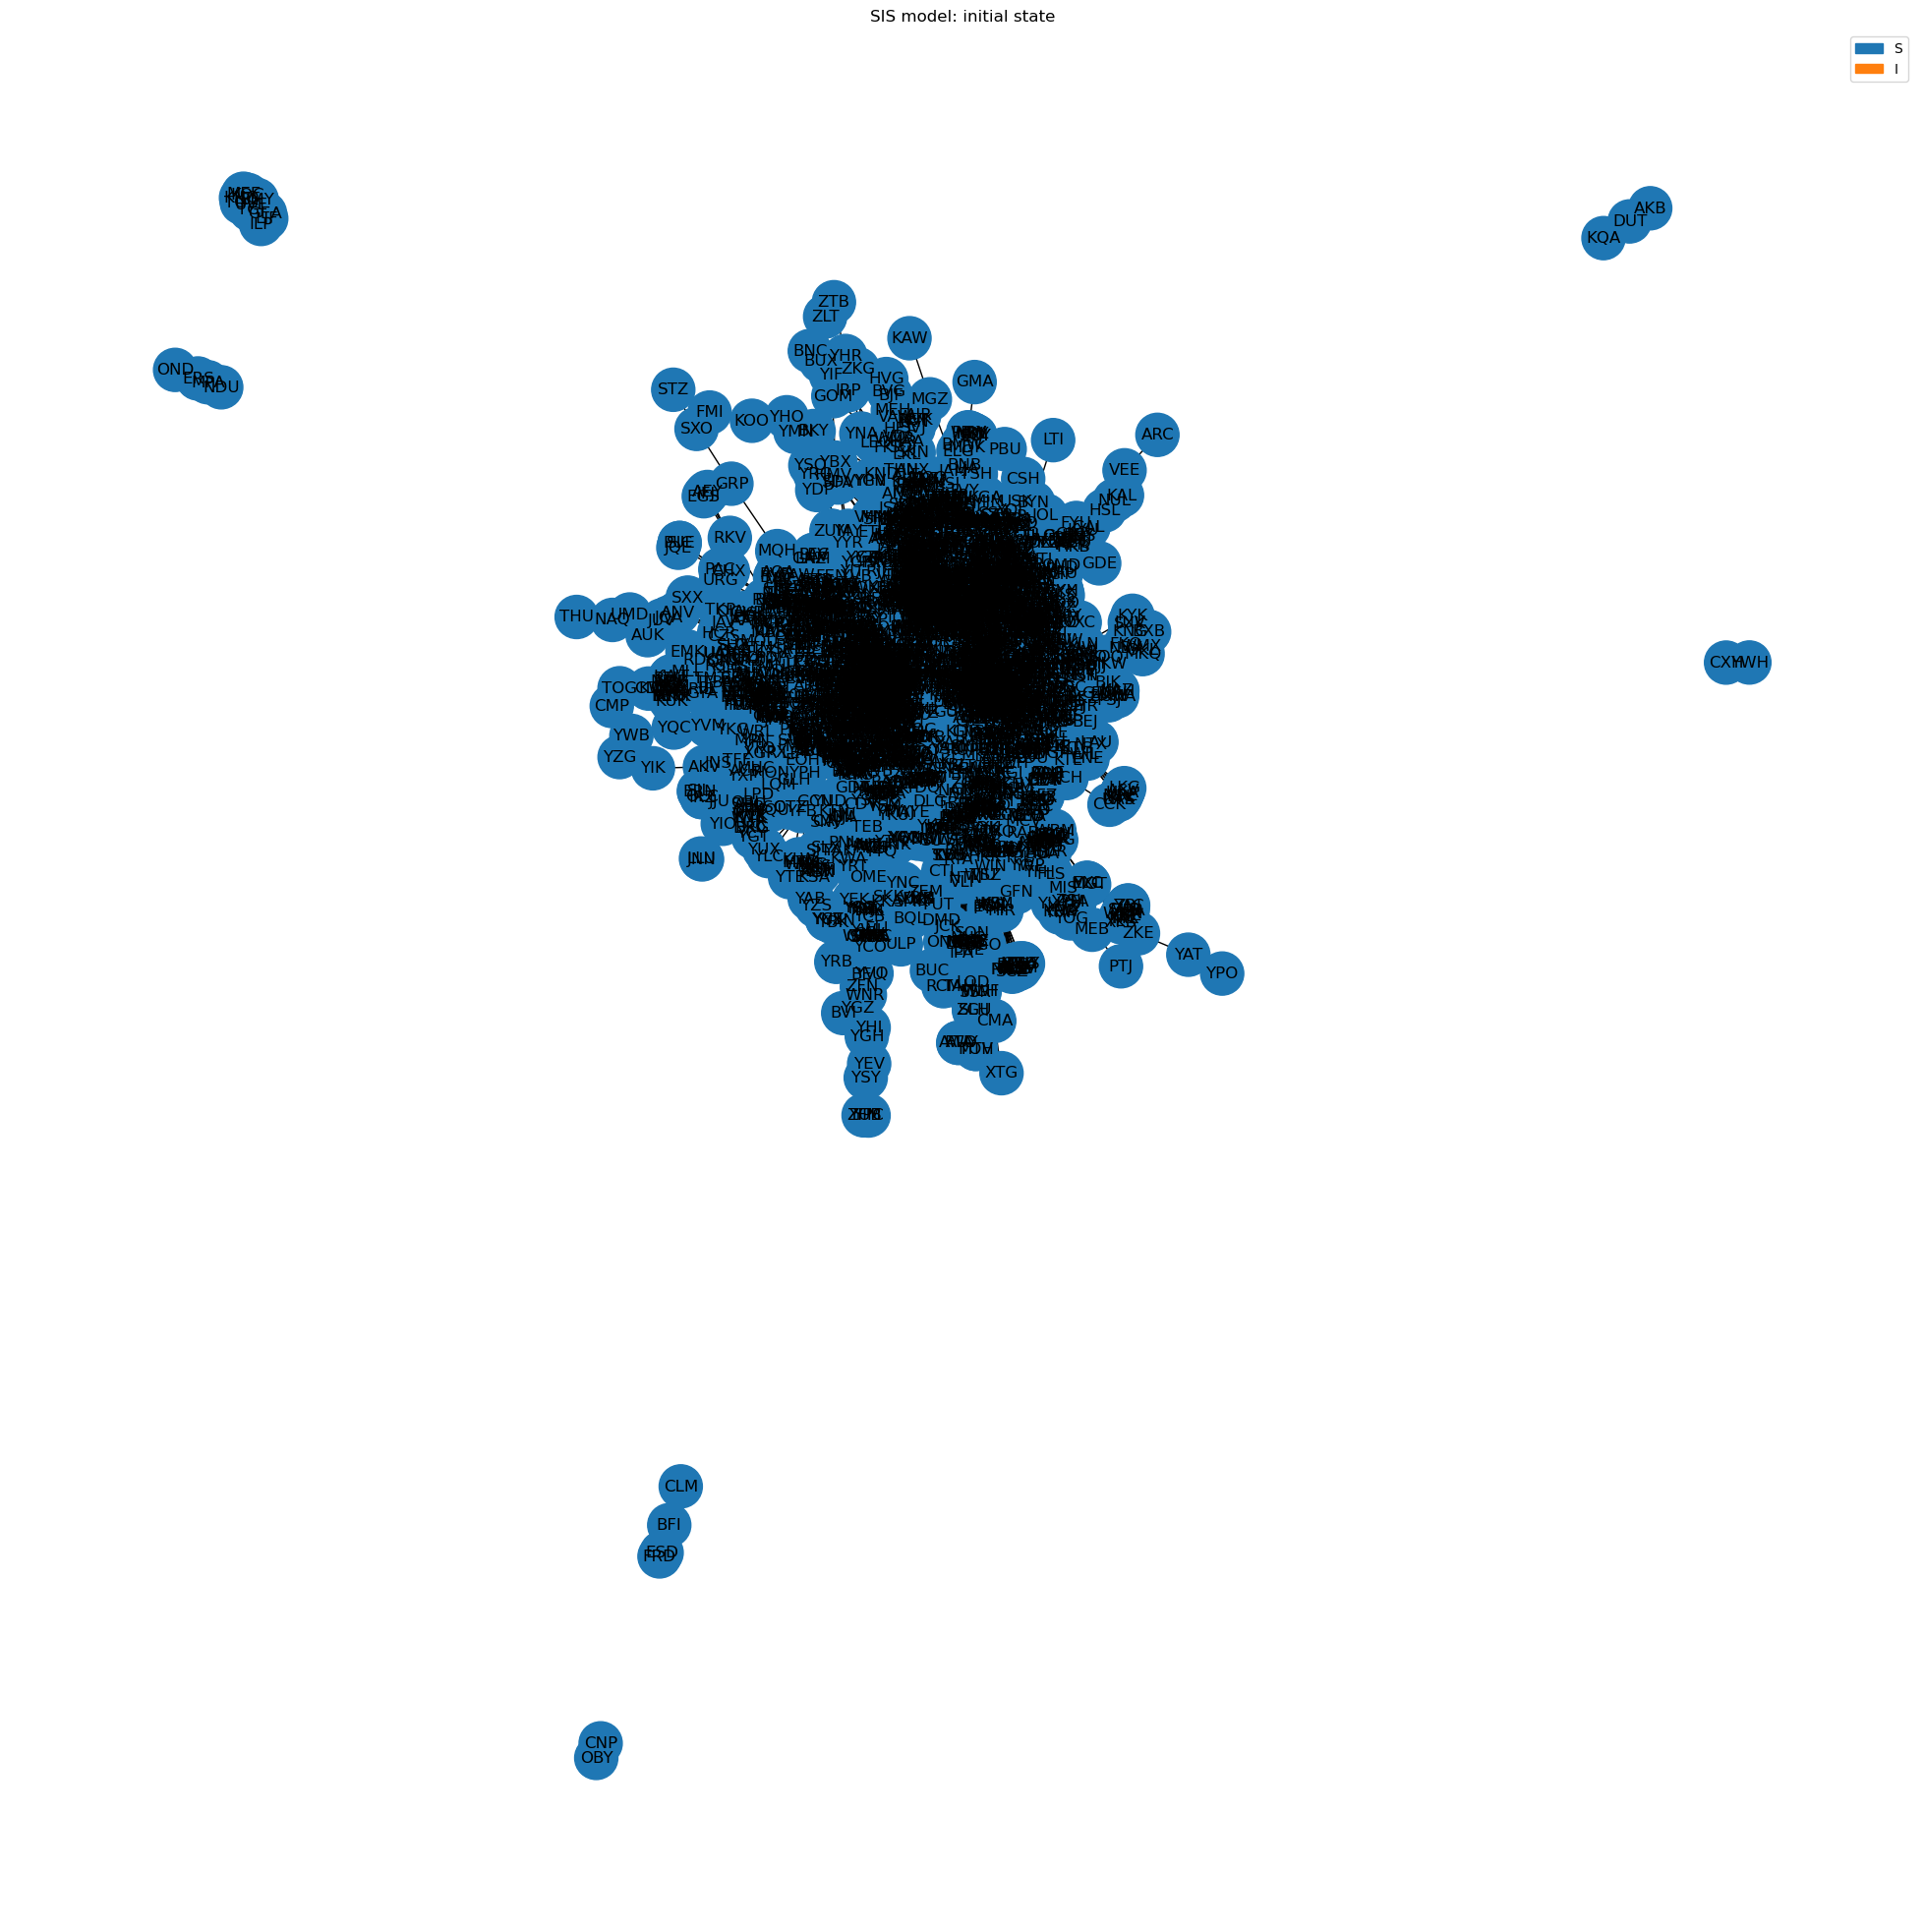

In [20]:
from simulation import Simulation
sim = Simulation(G, initial_state, state_transition, name='SIS model')
fig, ax = plt.subplots(figsize=(25, 25))
sim.draw(node_size=1000 , with_labels=True)

## Run di simulazione

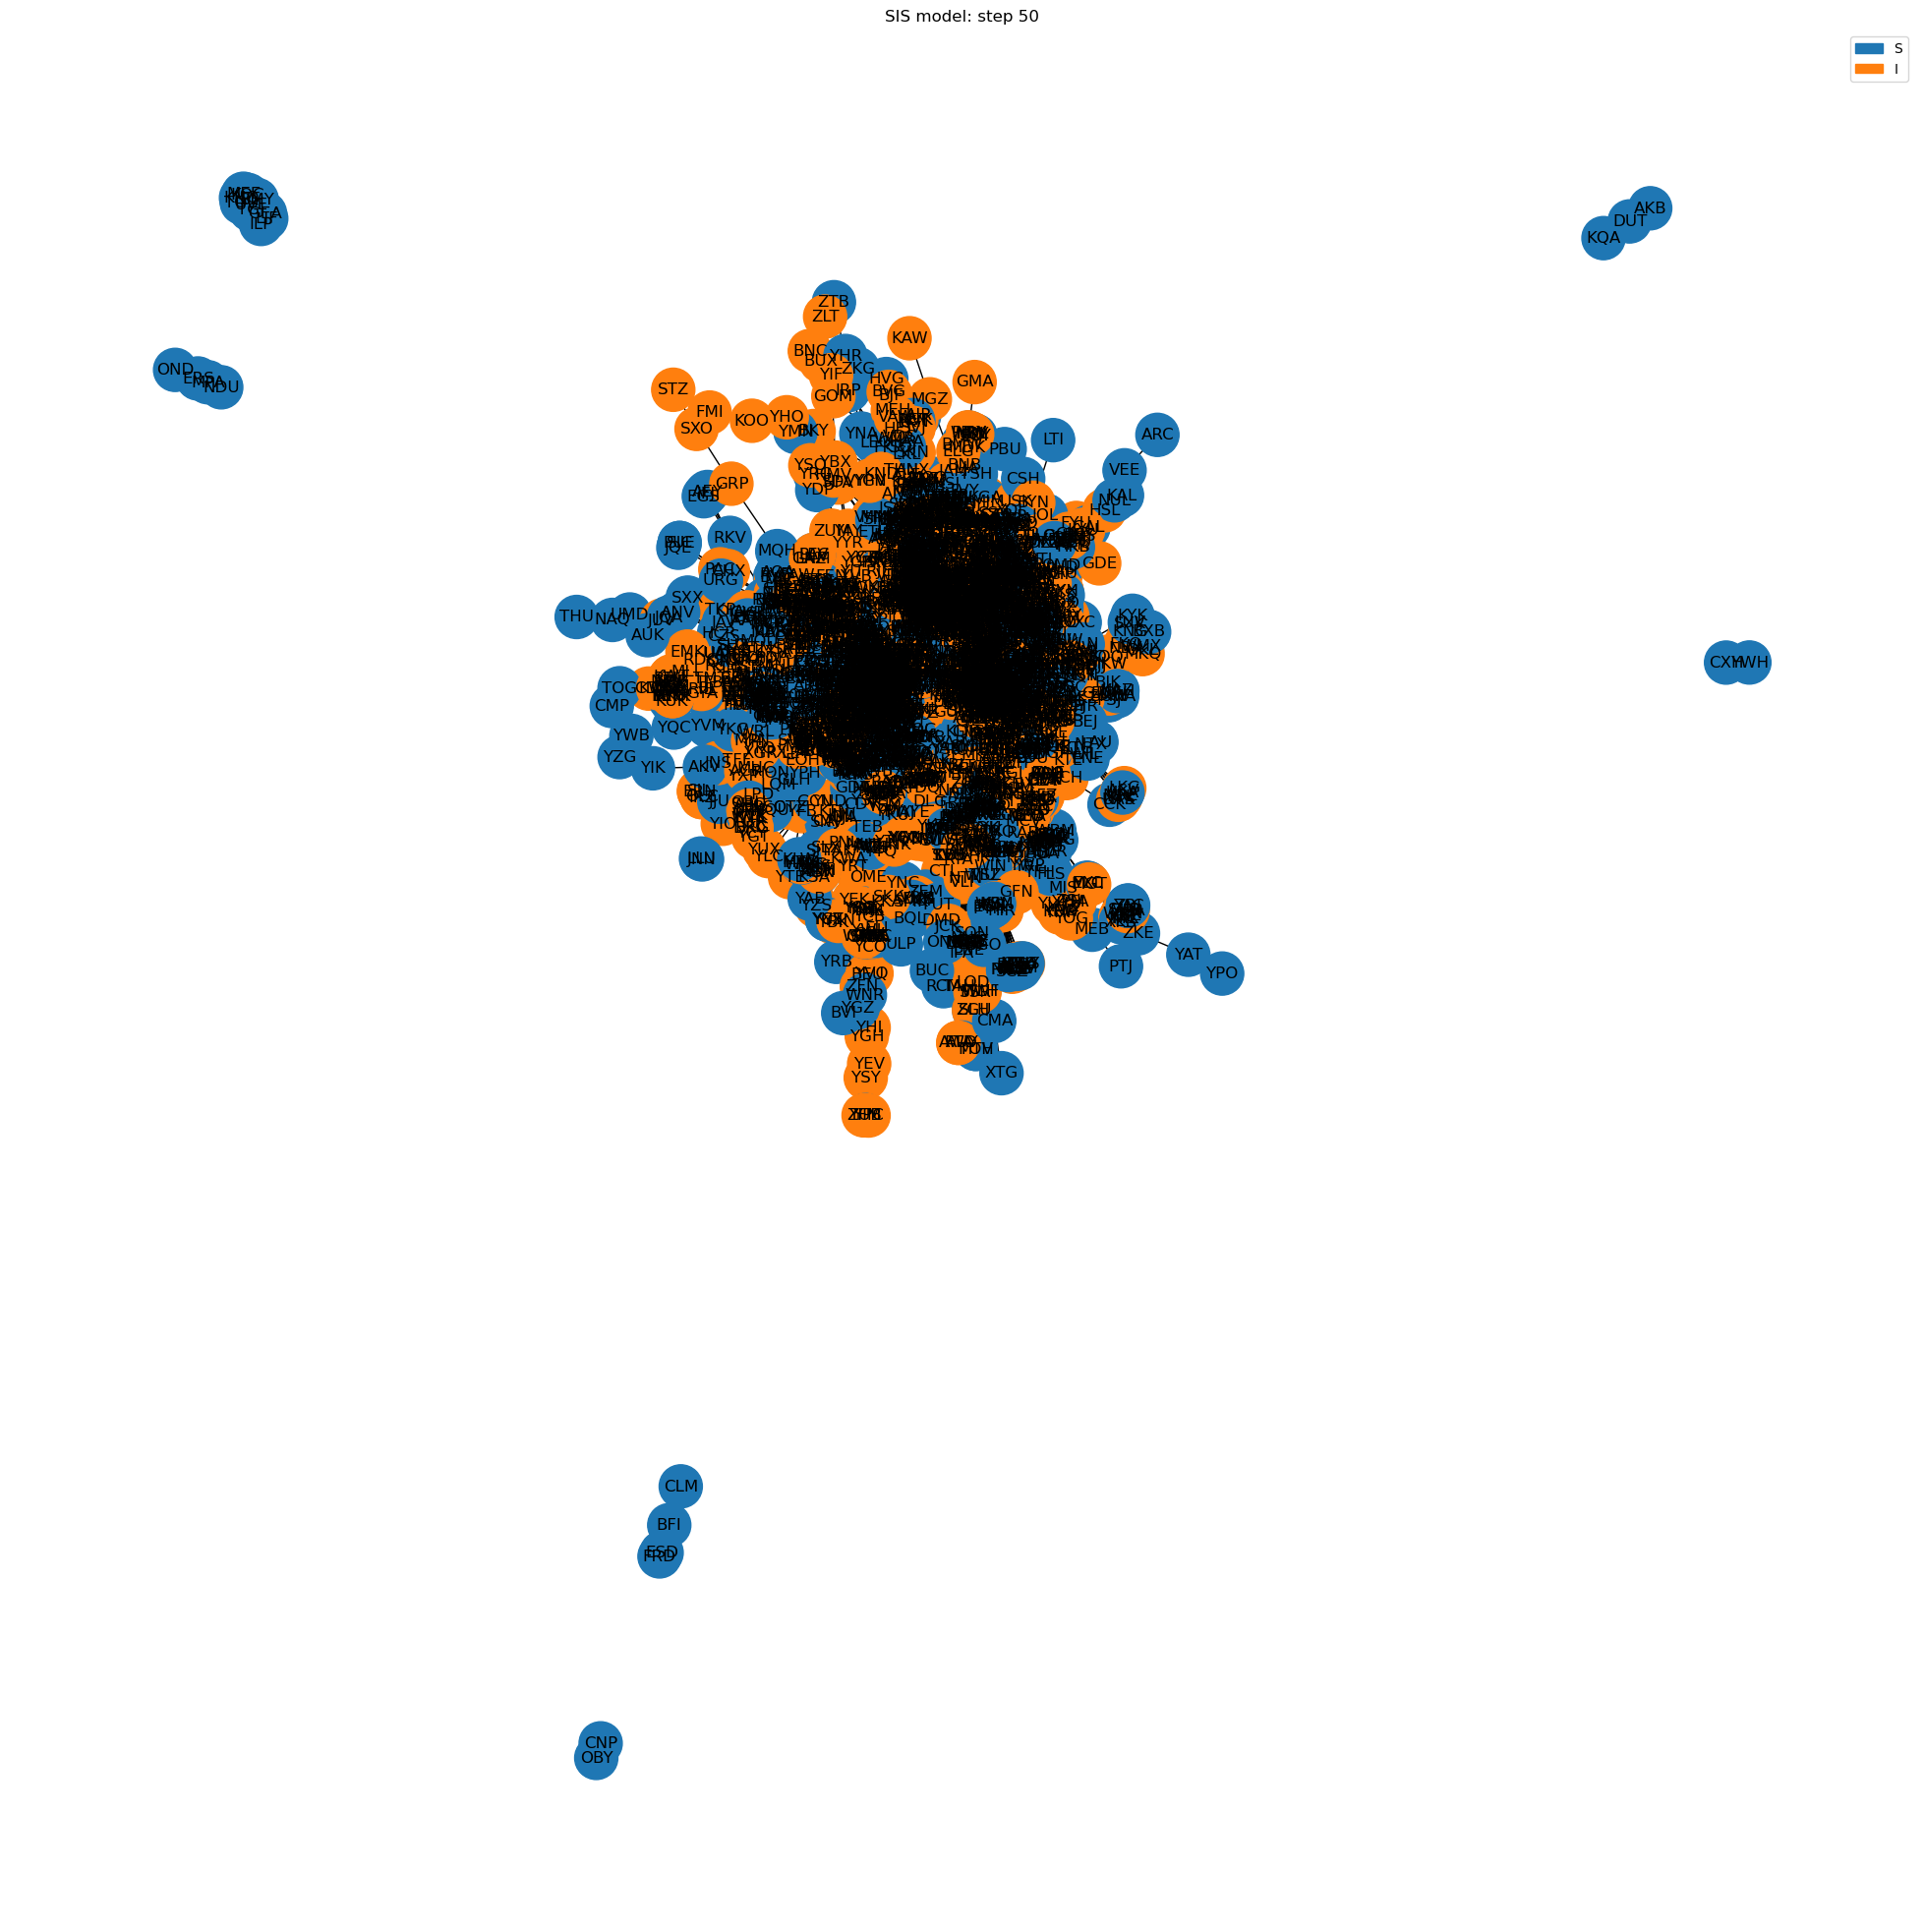

In [21]:
sim.run(50)
fig, ax = plt.subplots(figsize=(25, 25))
sim.draw(node_size=1000 , with_labels=True)

<AxesSubplot: title={'center': 'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

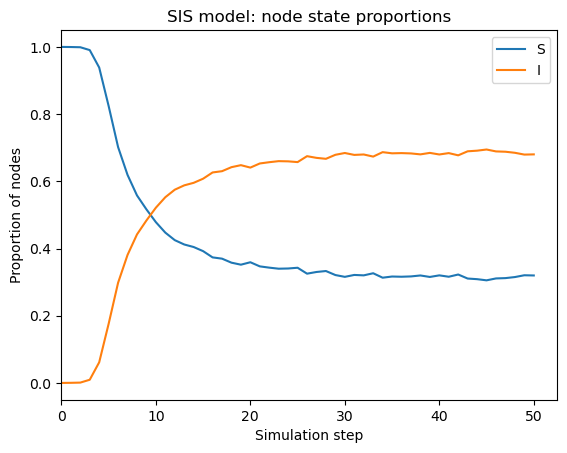

In [22]:
sim.plot()

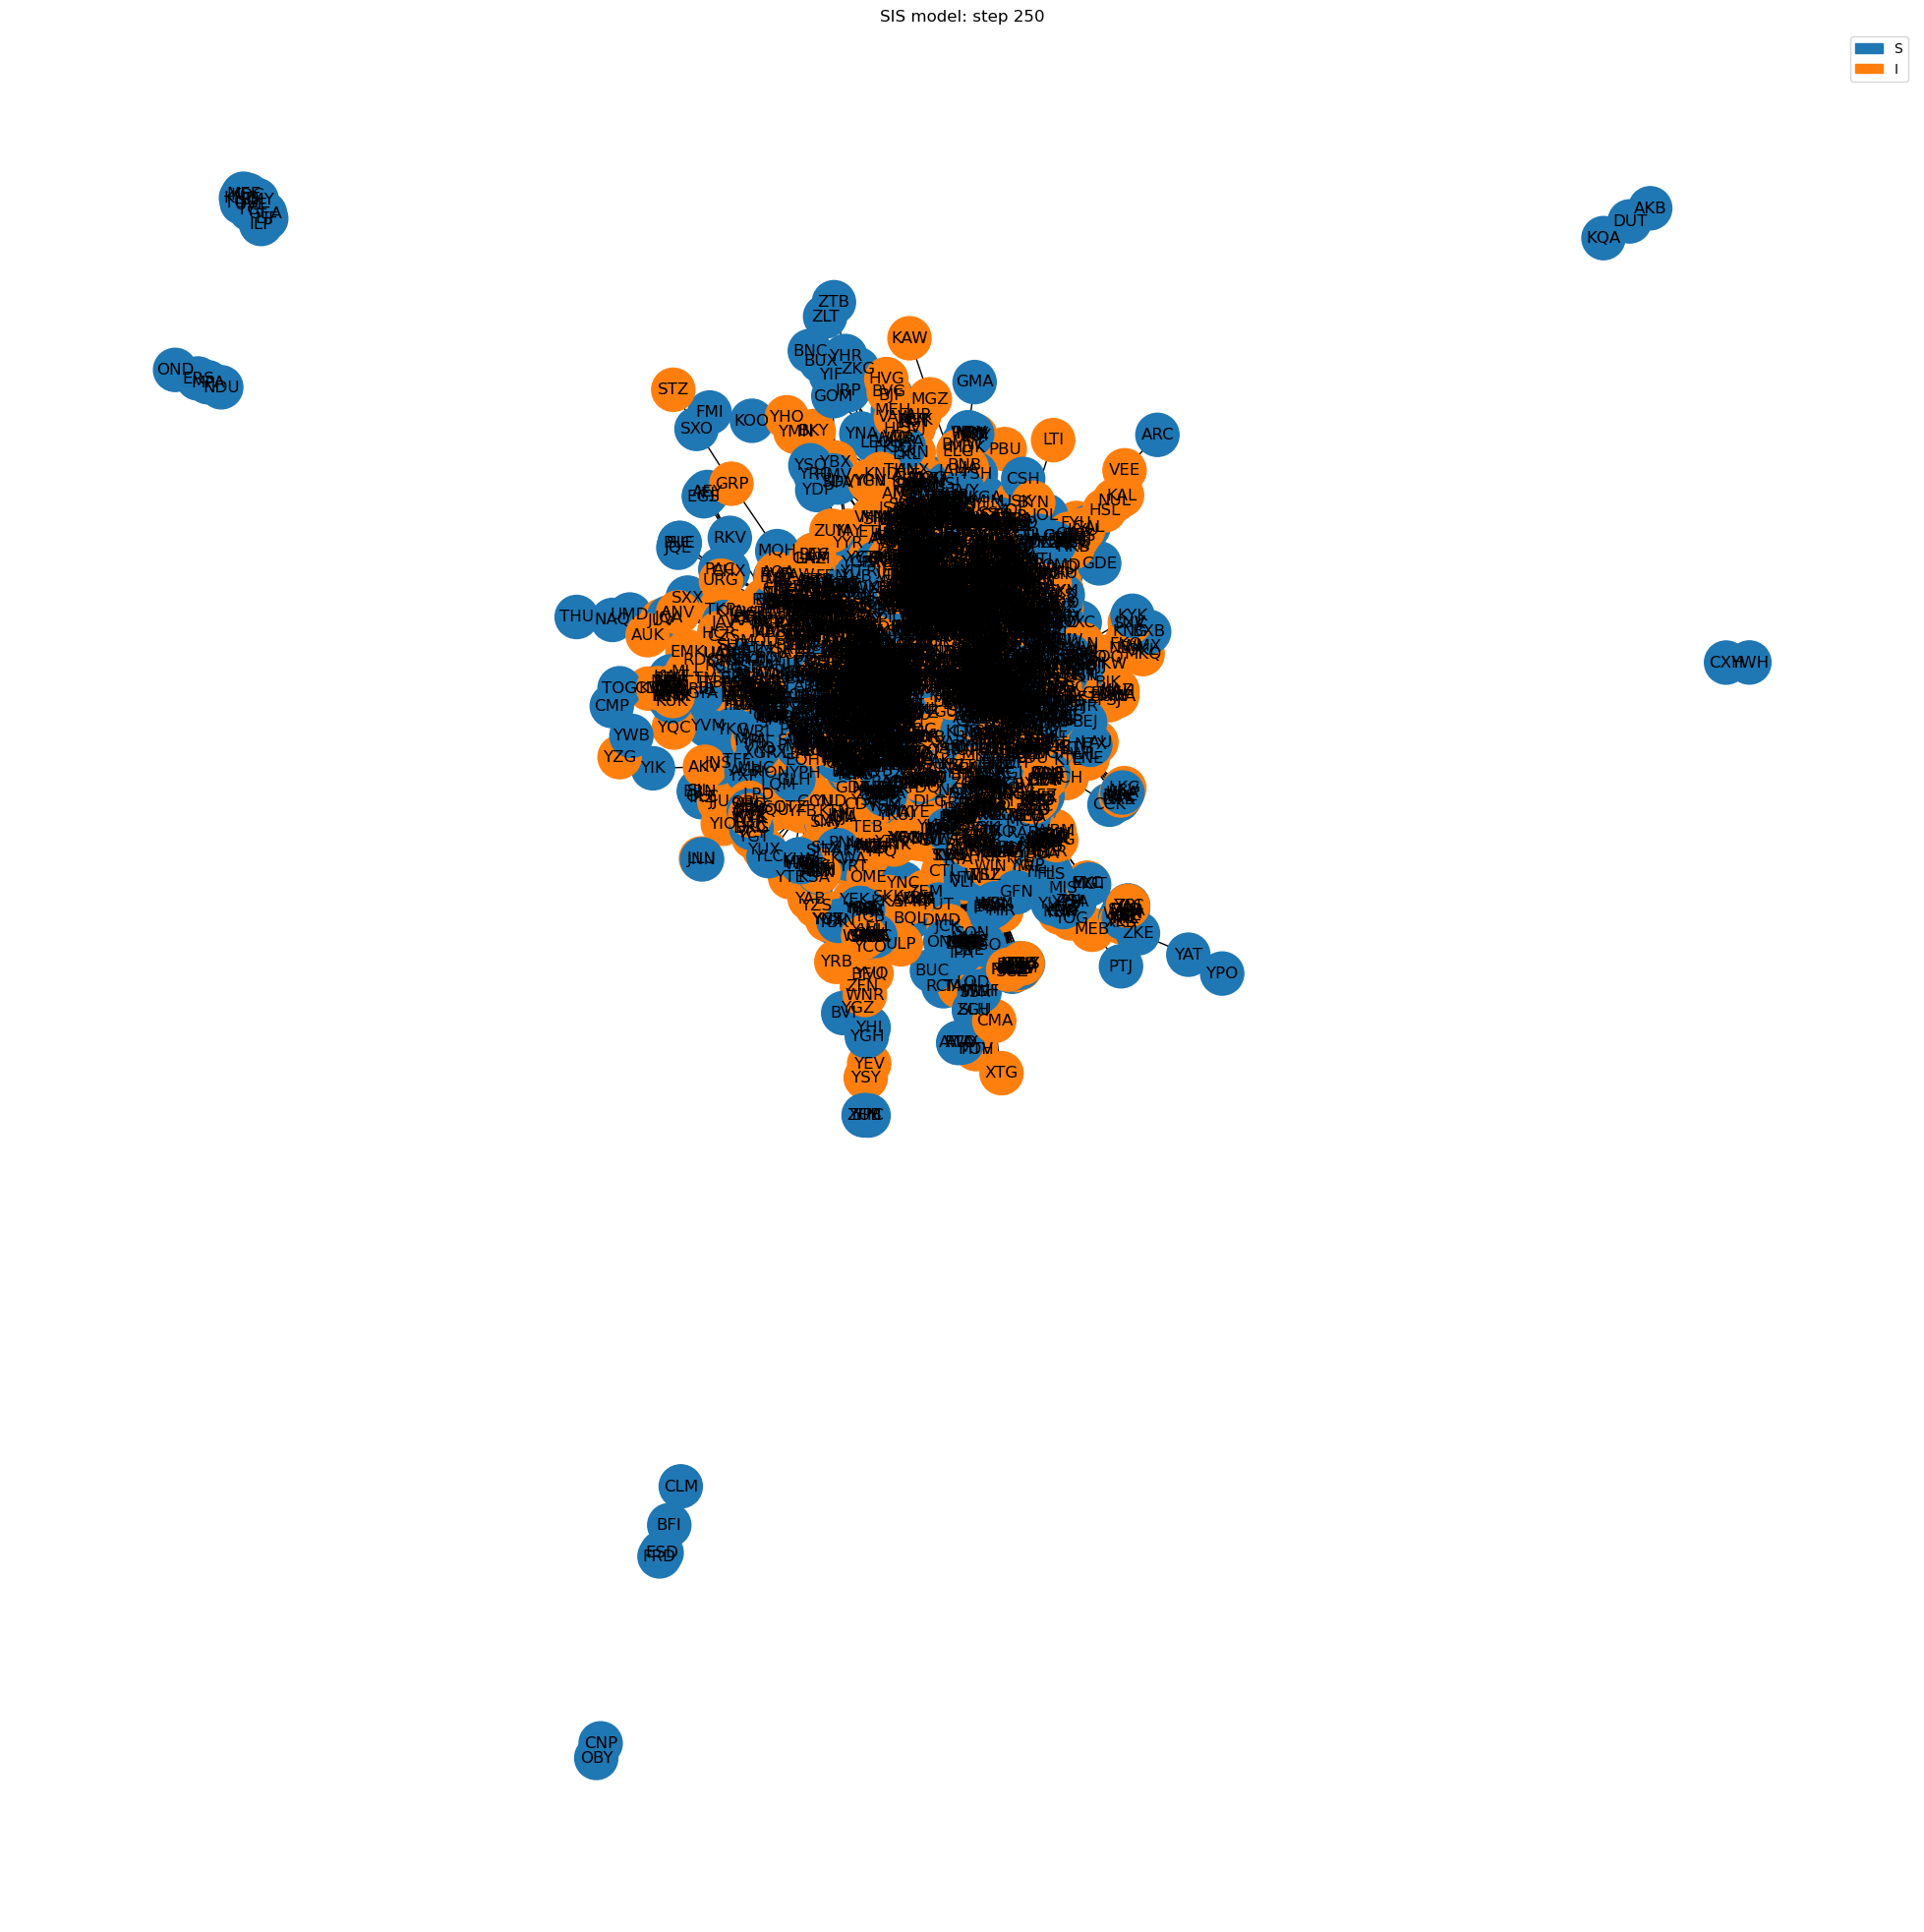

In [23]:
sim.run(200)
fig, ax = plt.subplots(figsize=(25, 25))
sim.draw(node_size=1000 , with_labels=True)

<AxesSubplot: title={'center': 'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

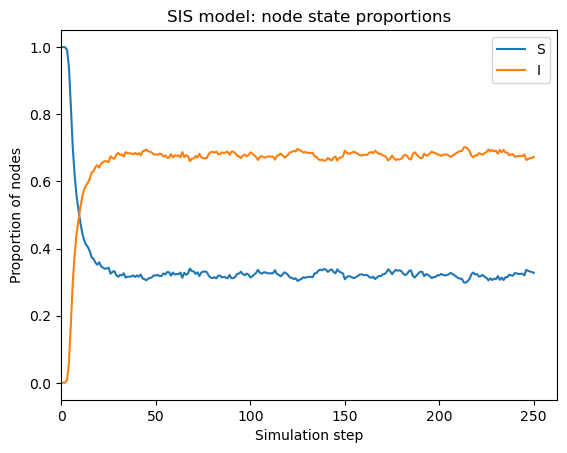

In [24]:
sim.plot()

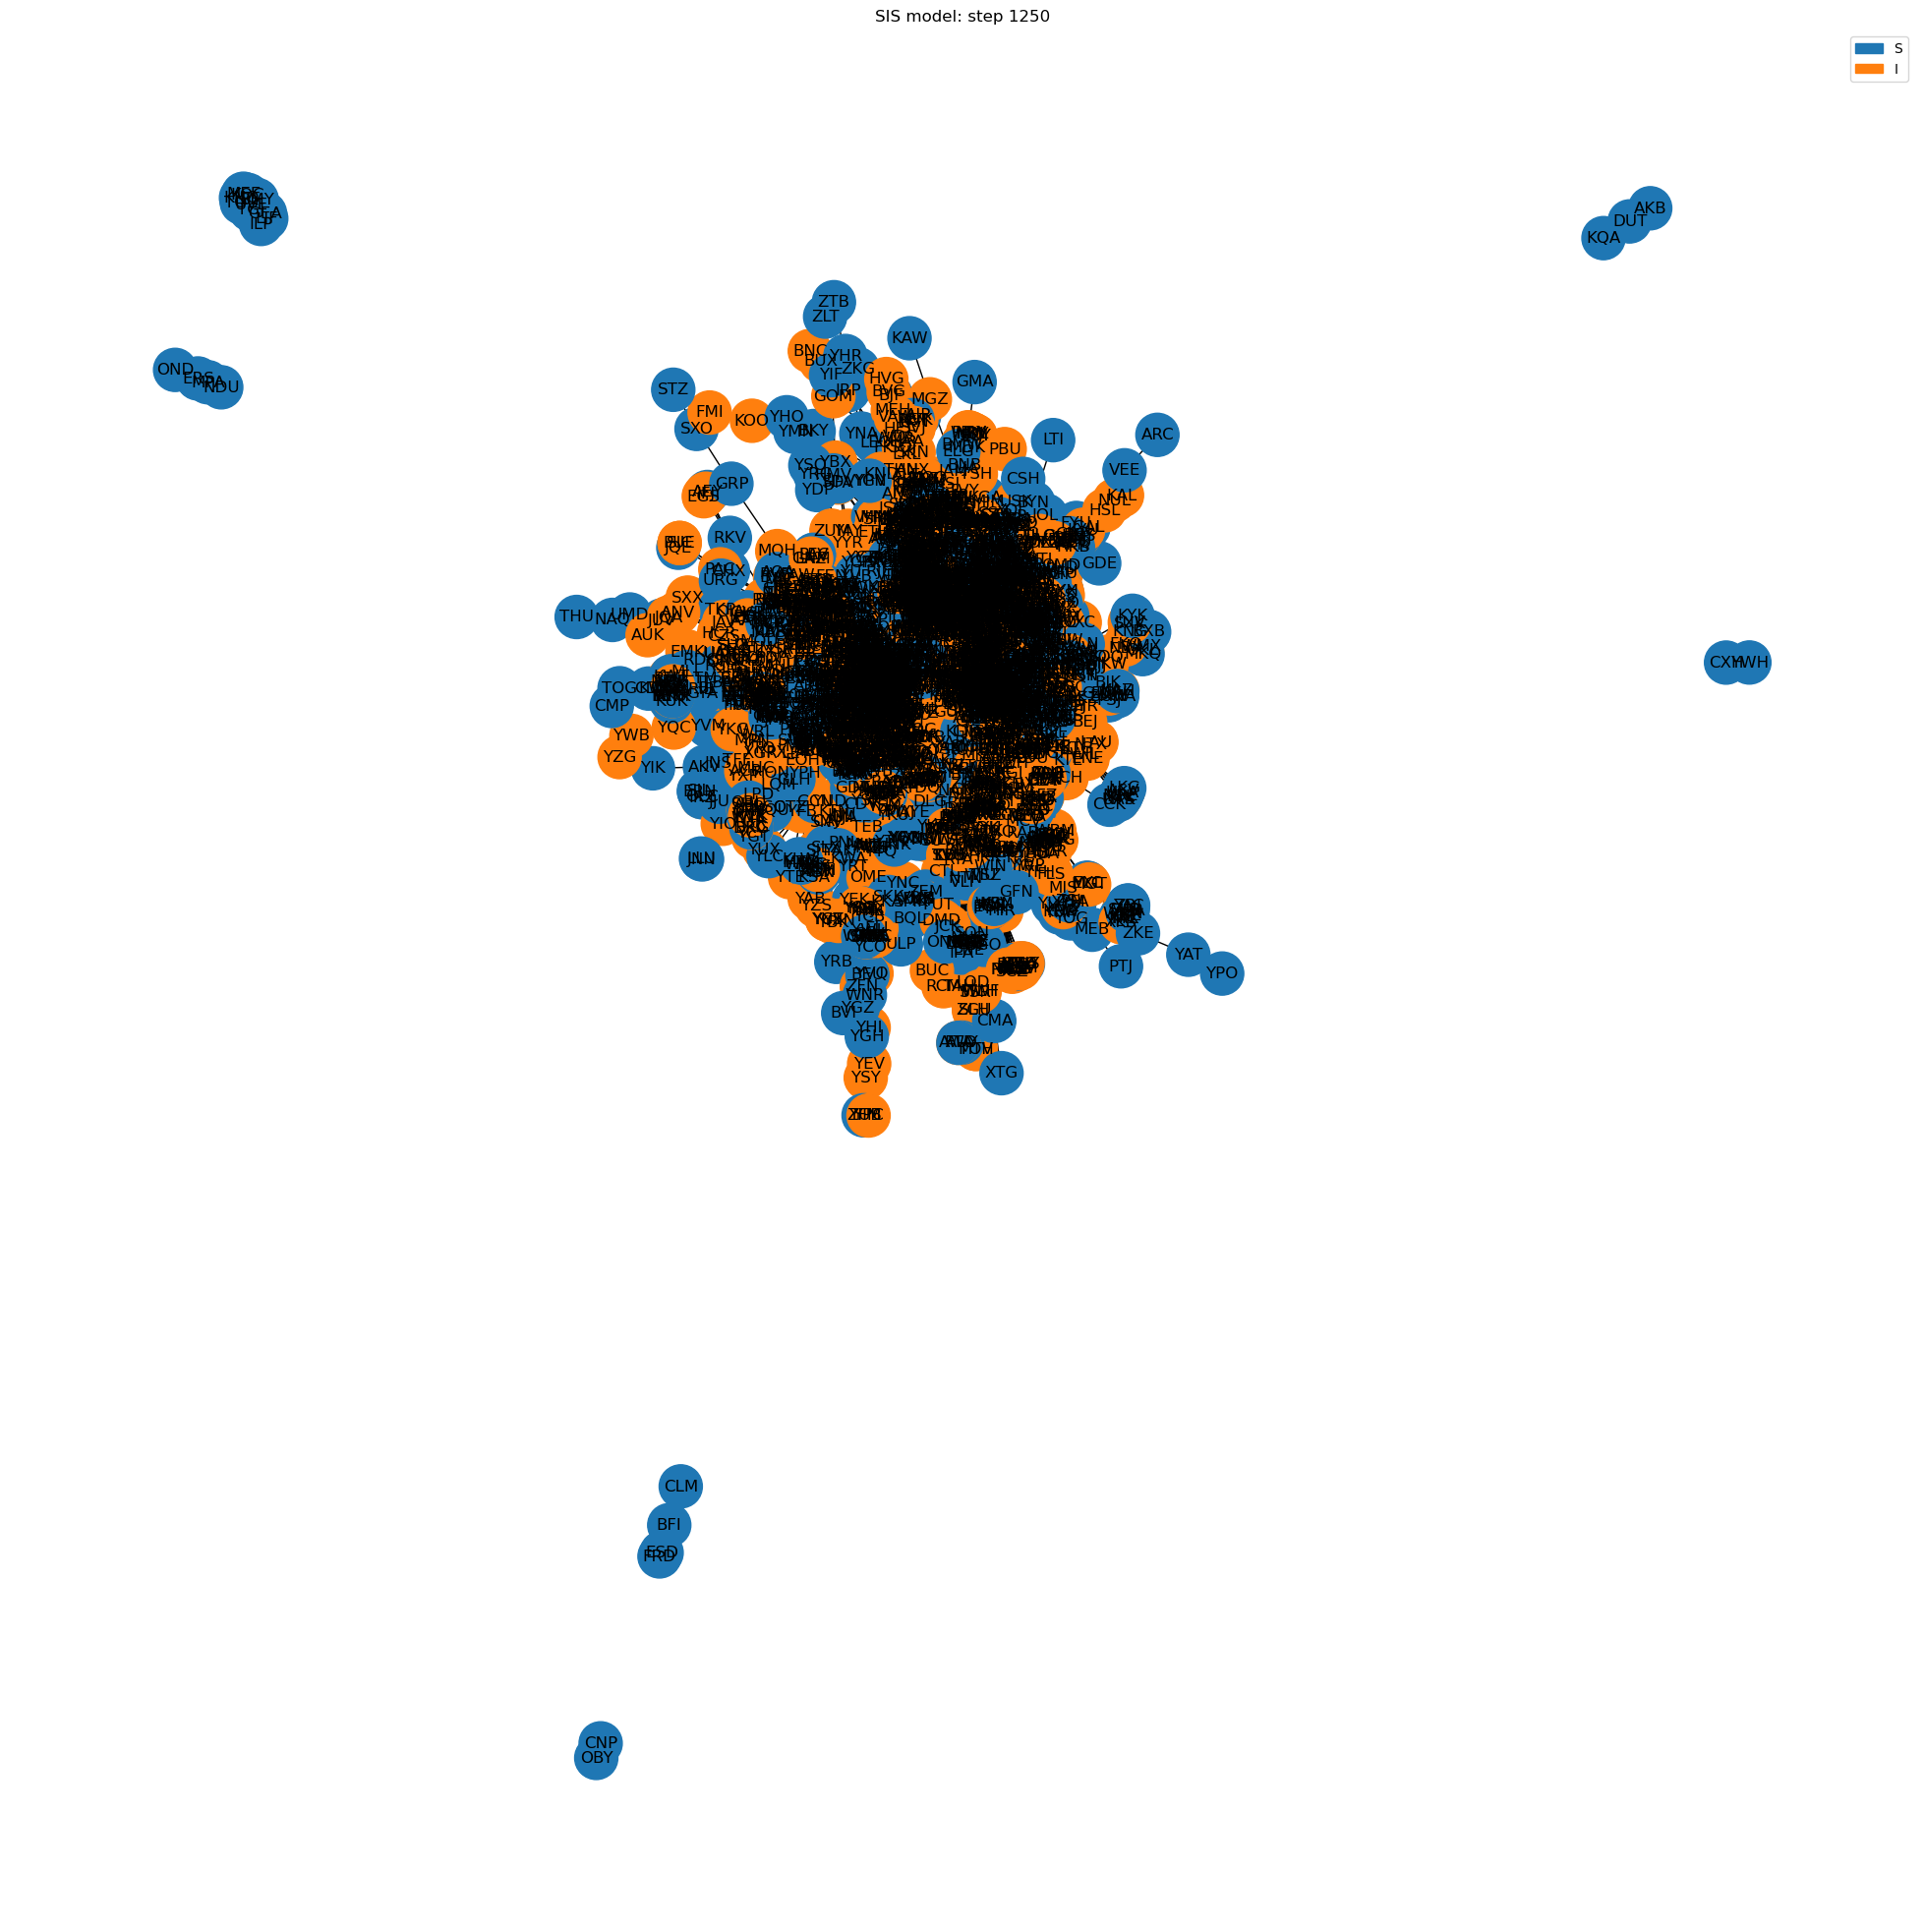

In [25]:
sim.run(1000)
fig, ax = plt.subplots(figsize=(25, 25))
sim.draw(node_size=1000 , with_labels=True)

<AxesSubplot: title={'center': 'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

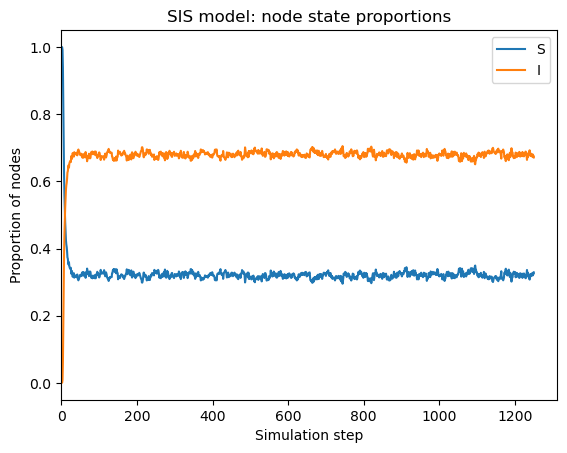

In [26]:
sim.plot()

Nella simulazione del modello SIS sulla rete aeroportuale mondiale, l'evoluzione della diffusione della malattia dipende dal numero di individui suscettibili (che non sono ancora stati infettati) e dal numero di individui infetti.

Inizialmente, il numero di individui suscettibili è molto maggiore rispetto al numero di individui infetti, quindi il numero di individui infetti tenderà ad aumentare rapidamente a causa della loro interazione con gli individui suscettibili. Tuttavia, man mano che il numero di individui infetti aumenta, il numero di individui suscettibili diminuisce, poiché un numero crescente di individui diventa infetto e acquisisce l'immunità temporanea.

Quando il numero di individui suscettibili si avvicina a zero, l'aumento del numero di individui infetti diventa più lento, poiché il numero di individui suscettibili rimanenti è troppo piccolo per sostenere un'alta velocità di diffusione della malattia. Allo stesso tempo, il numero di individui infetti che guariscono e tornano ad essere suscettibili aumenta, aumentando il numero di individui suscettibili nella rete.

In questo modo, le percentuali di infetti e di suscettibili tendono a bilanciarsi quando il numero di individui suscettibili e infetti si stabilizza in un equilibrio dinamico, ovvero quando il tasso di infezione e di guarigione della malattia si bilancia in modo da mantenere un numero costante di individui suscettibili e infetti.

Ma un aeroporto è un’entità complessa:

- se un elemento di tale entità si infetta posso dire che l’aeroporto è infetto
- se lo stesso elemento guarisce non posso dire che l’aeroporto è guarito perchè potrebbero esserci stati dei contagi interni ⇒ può ever senso diminuire la probabilità di guarigione

In [67]:
#provo a diminuire la probabilità di guarigione
MU = 0.025

BETA = 0.1

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state

test_state = initial_state(G)
state_transition(G, test_state)

{}

# Simulazione 2

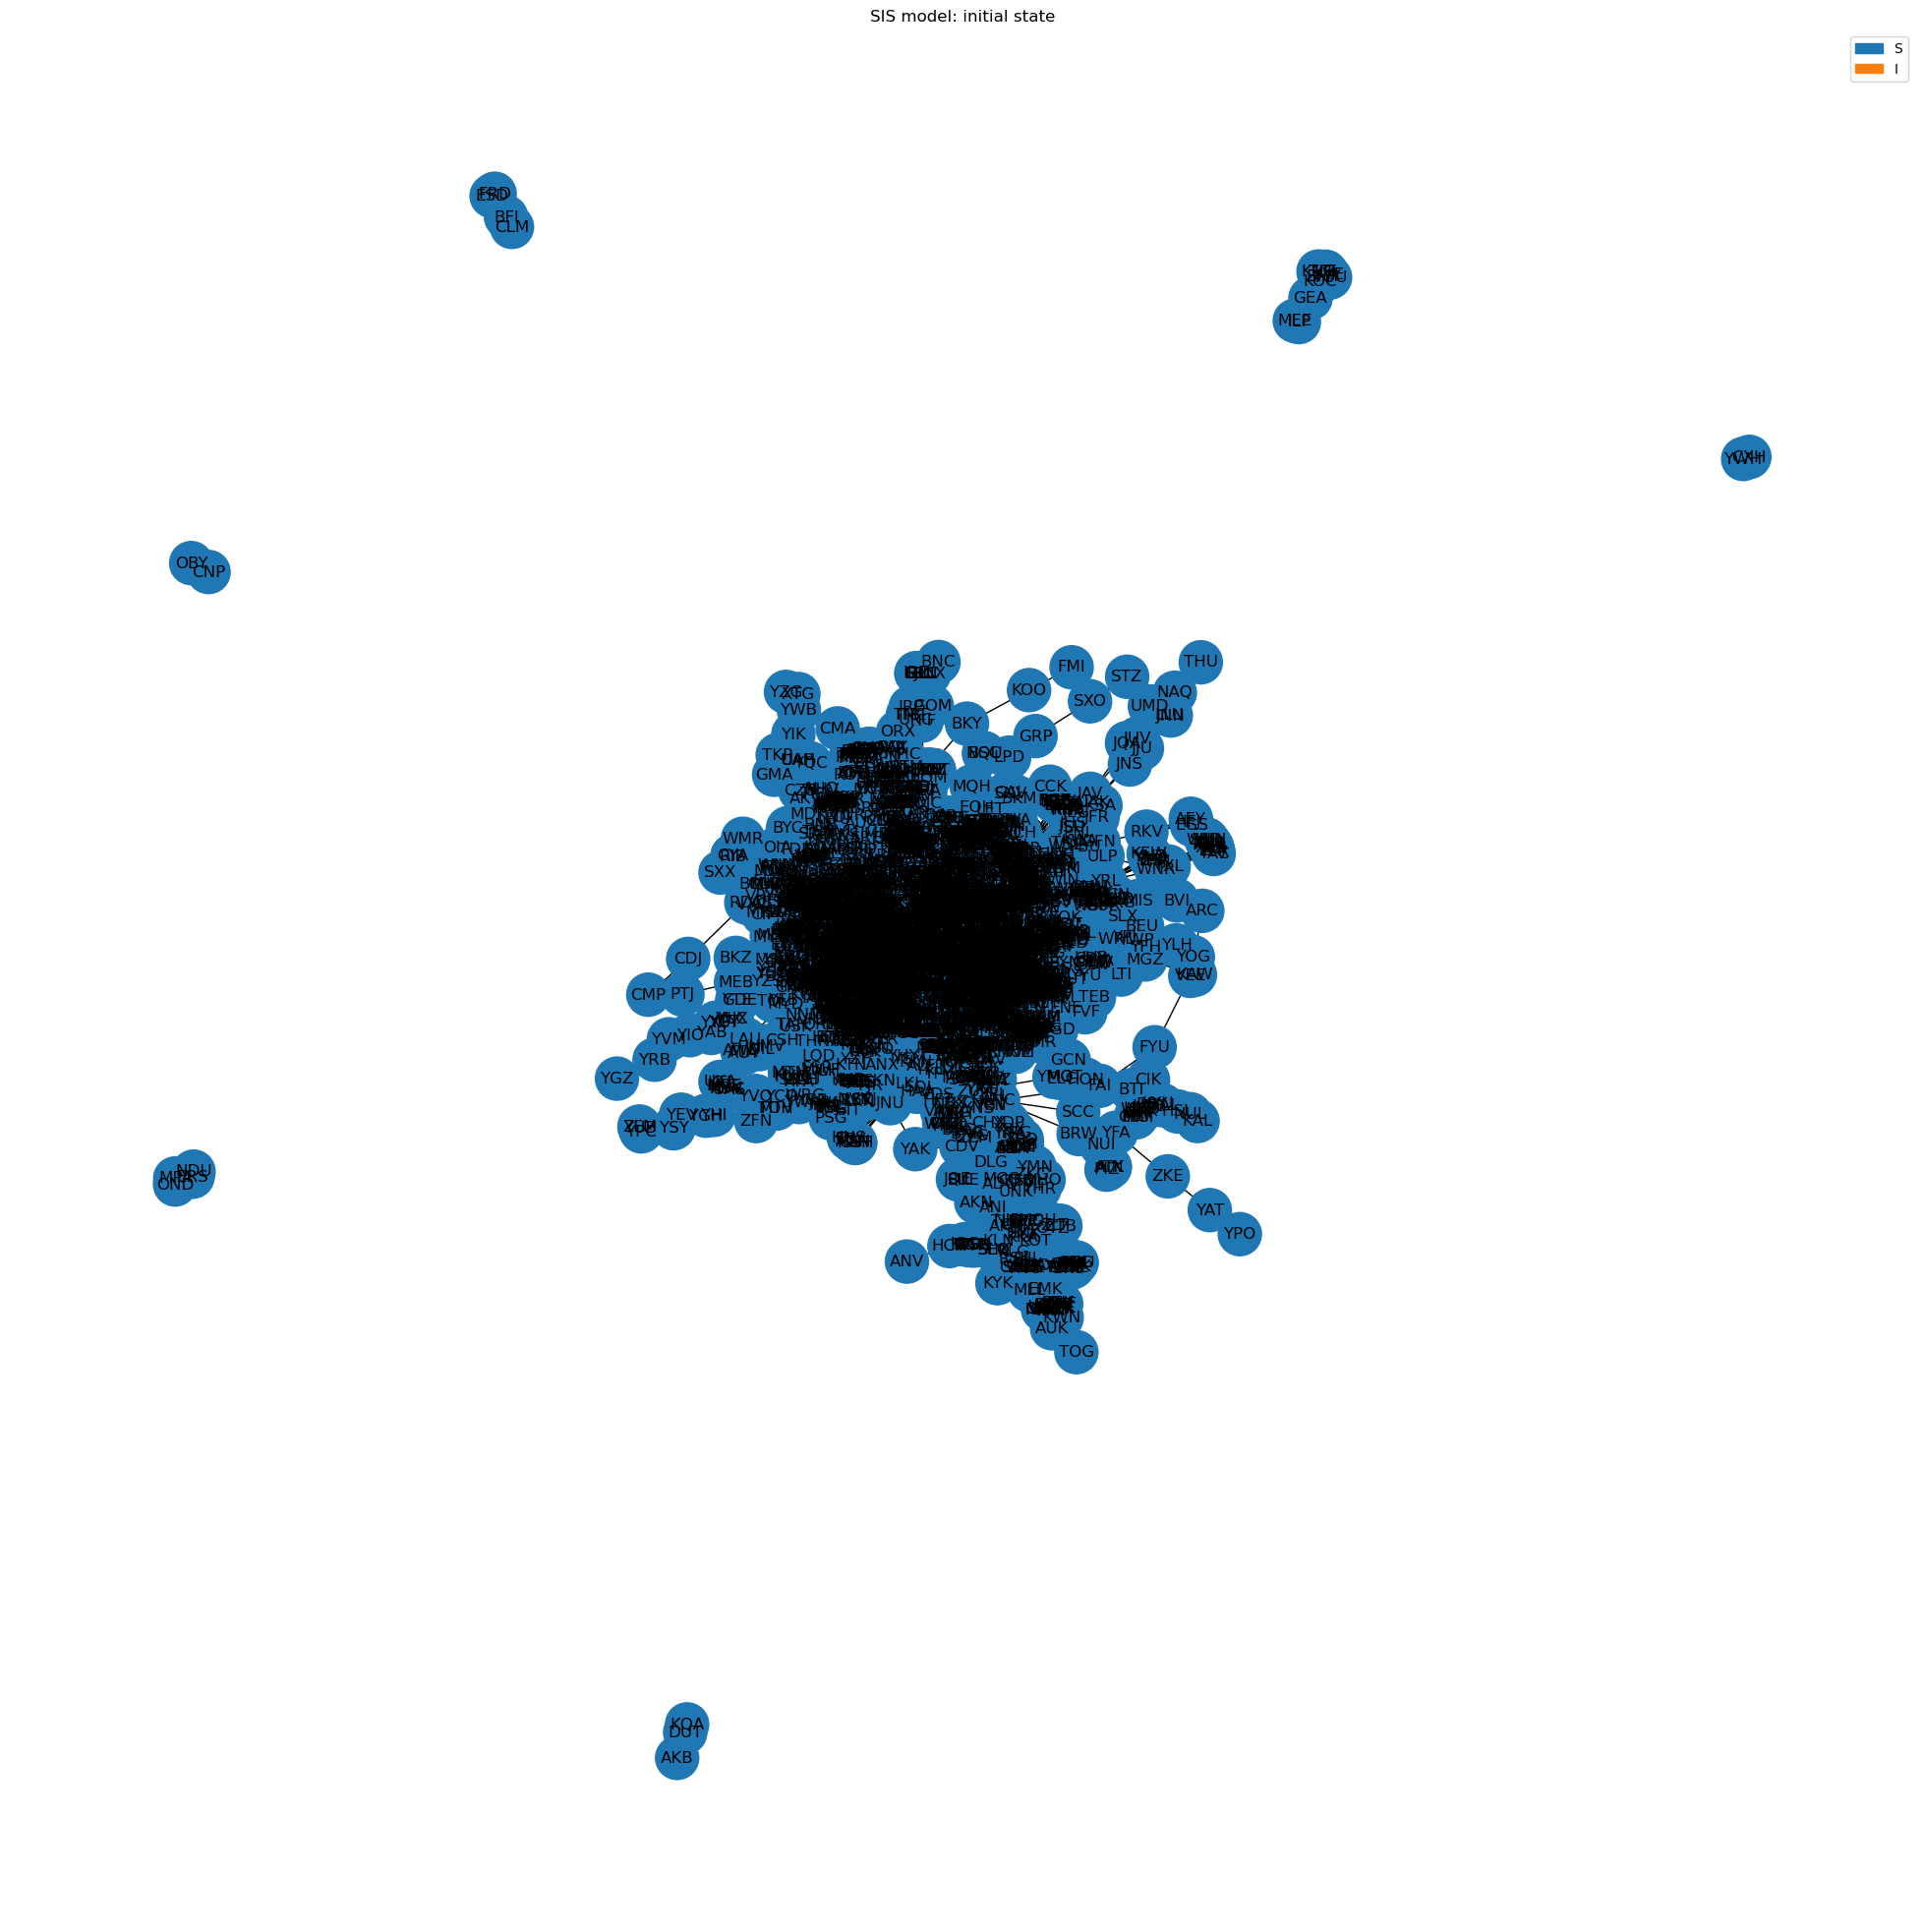

In [68]:
from simulation import Simulation
sim = Simulation(G, initial_state, state_transition, name='SIS model')
fig, ax = plt.subplots(figsize=(25, 25))
sim.draw(node_size=1000 , with_labels=True)

Run di simulazione

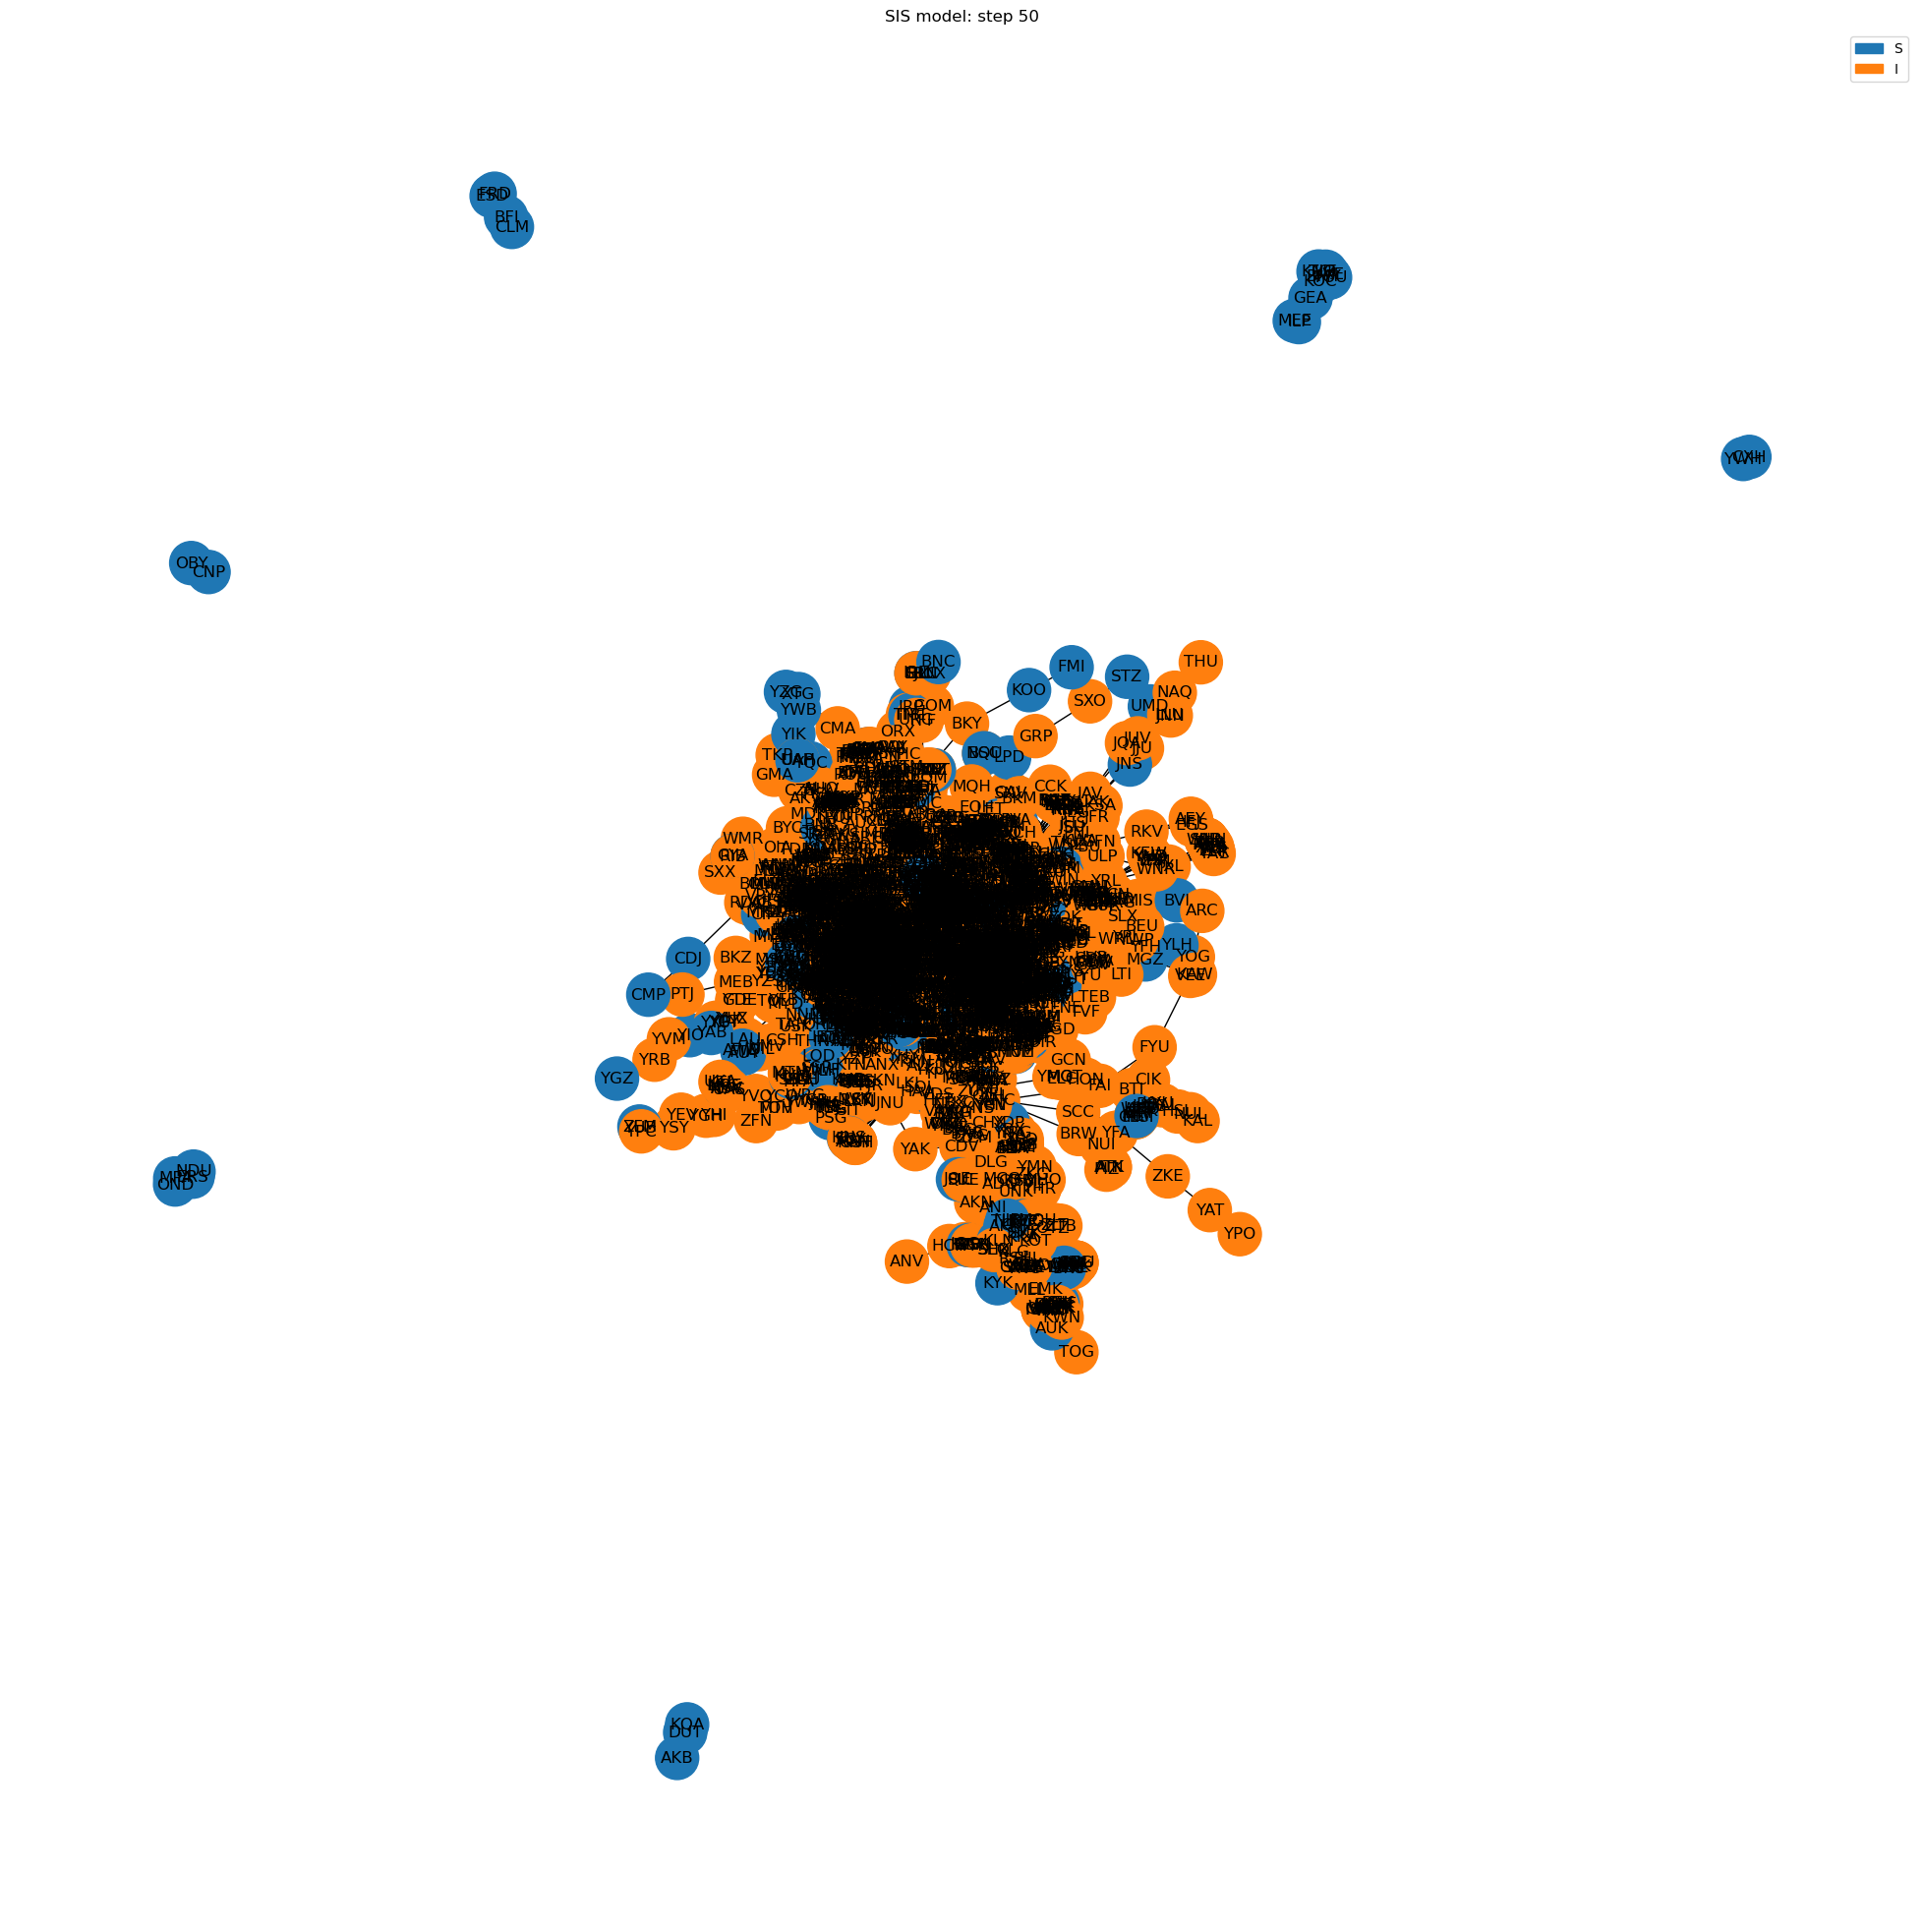

In [69]:
sim.run(50)
fig, ax = plt.subplots(figsize=(25, 25))
sim.draw(node_size=1000 , with_labels=True)

<AxesSubplot: title={'center': 'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

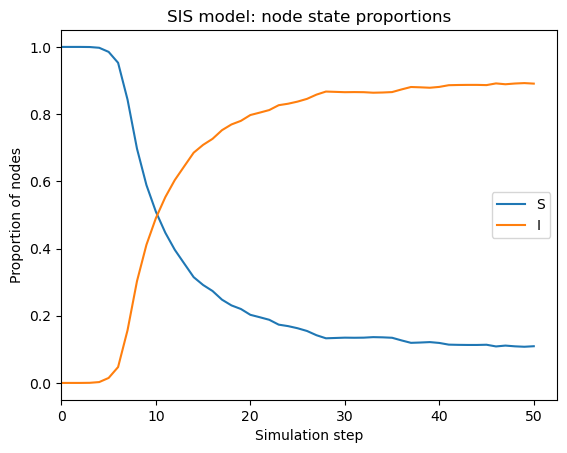

In [70]:
sim.plot()

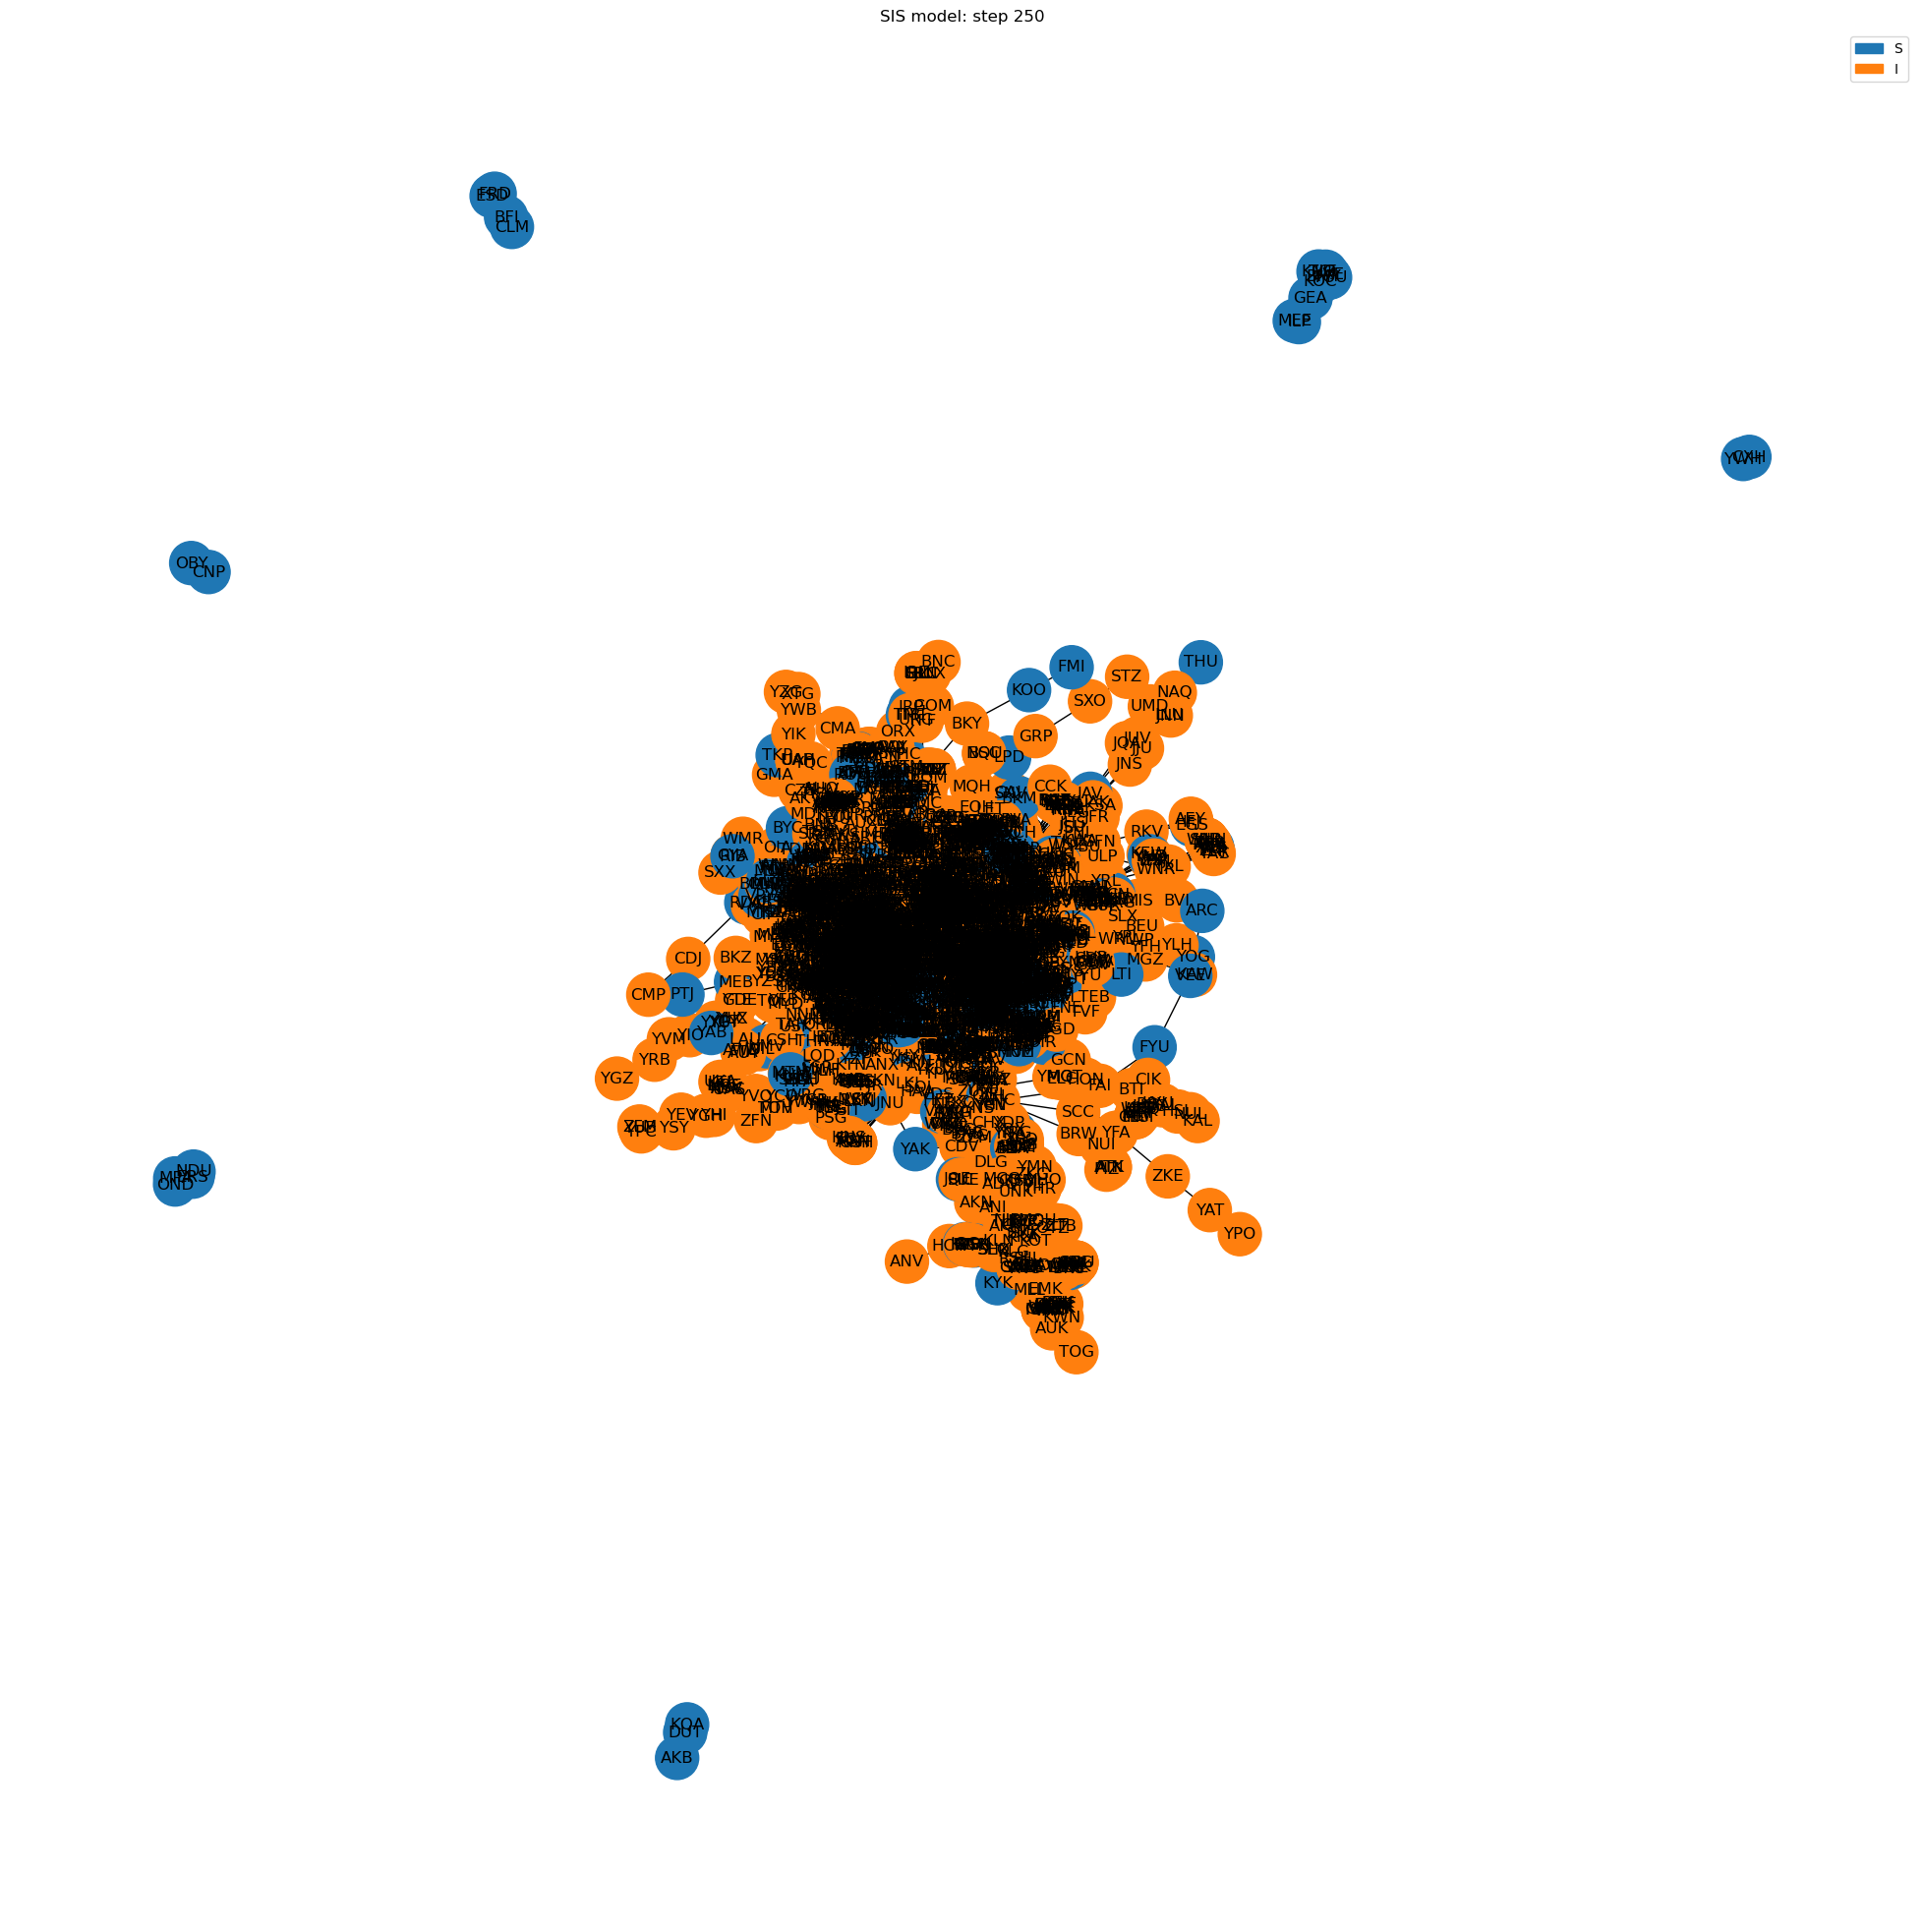

In [71]:
sim.run(200)
fig, ax = plt.subplots(figsize=(25, 25))
sim.draw(node_size=1000 , with_labels=True)

<AxesSubplot: title={'center': 'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

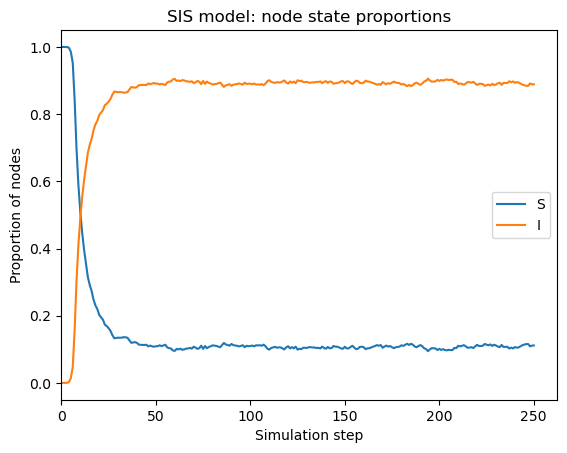

In [72]:
sim.plot()

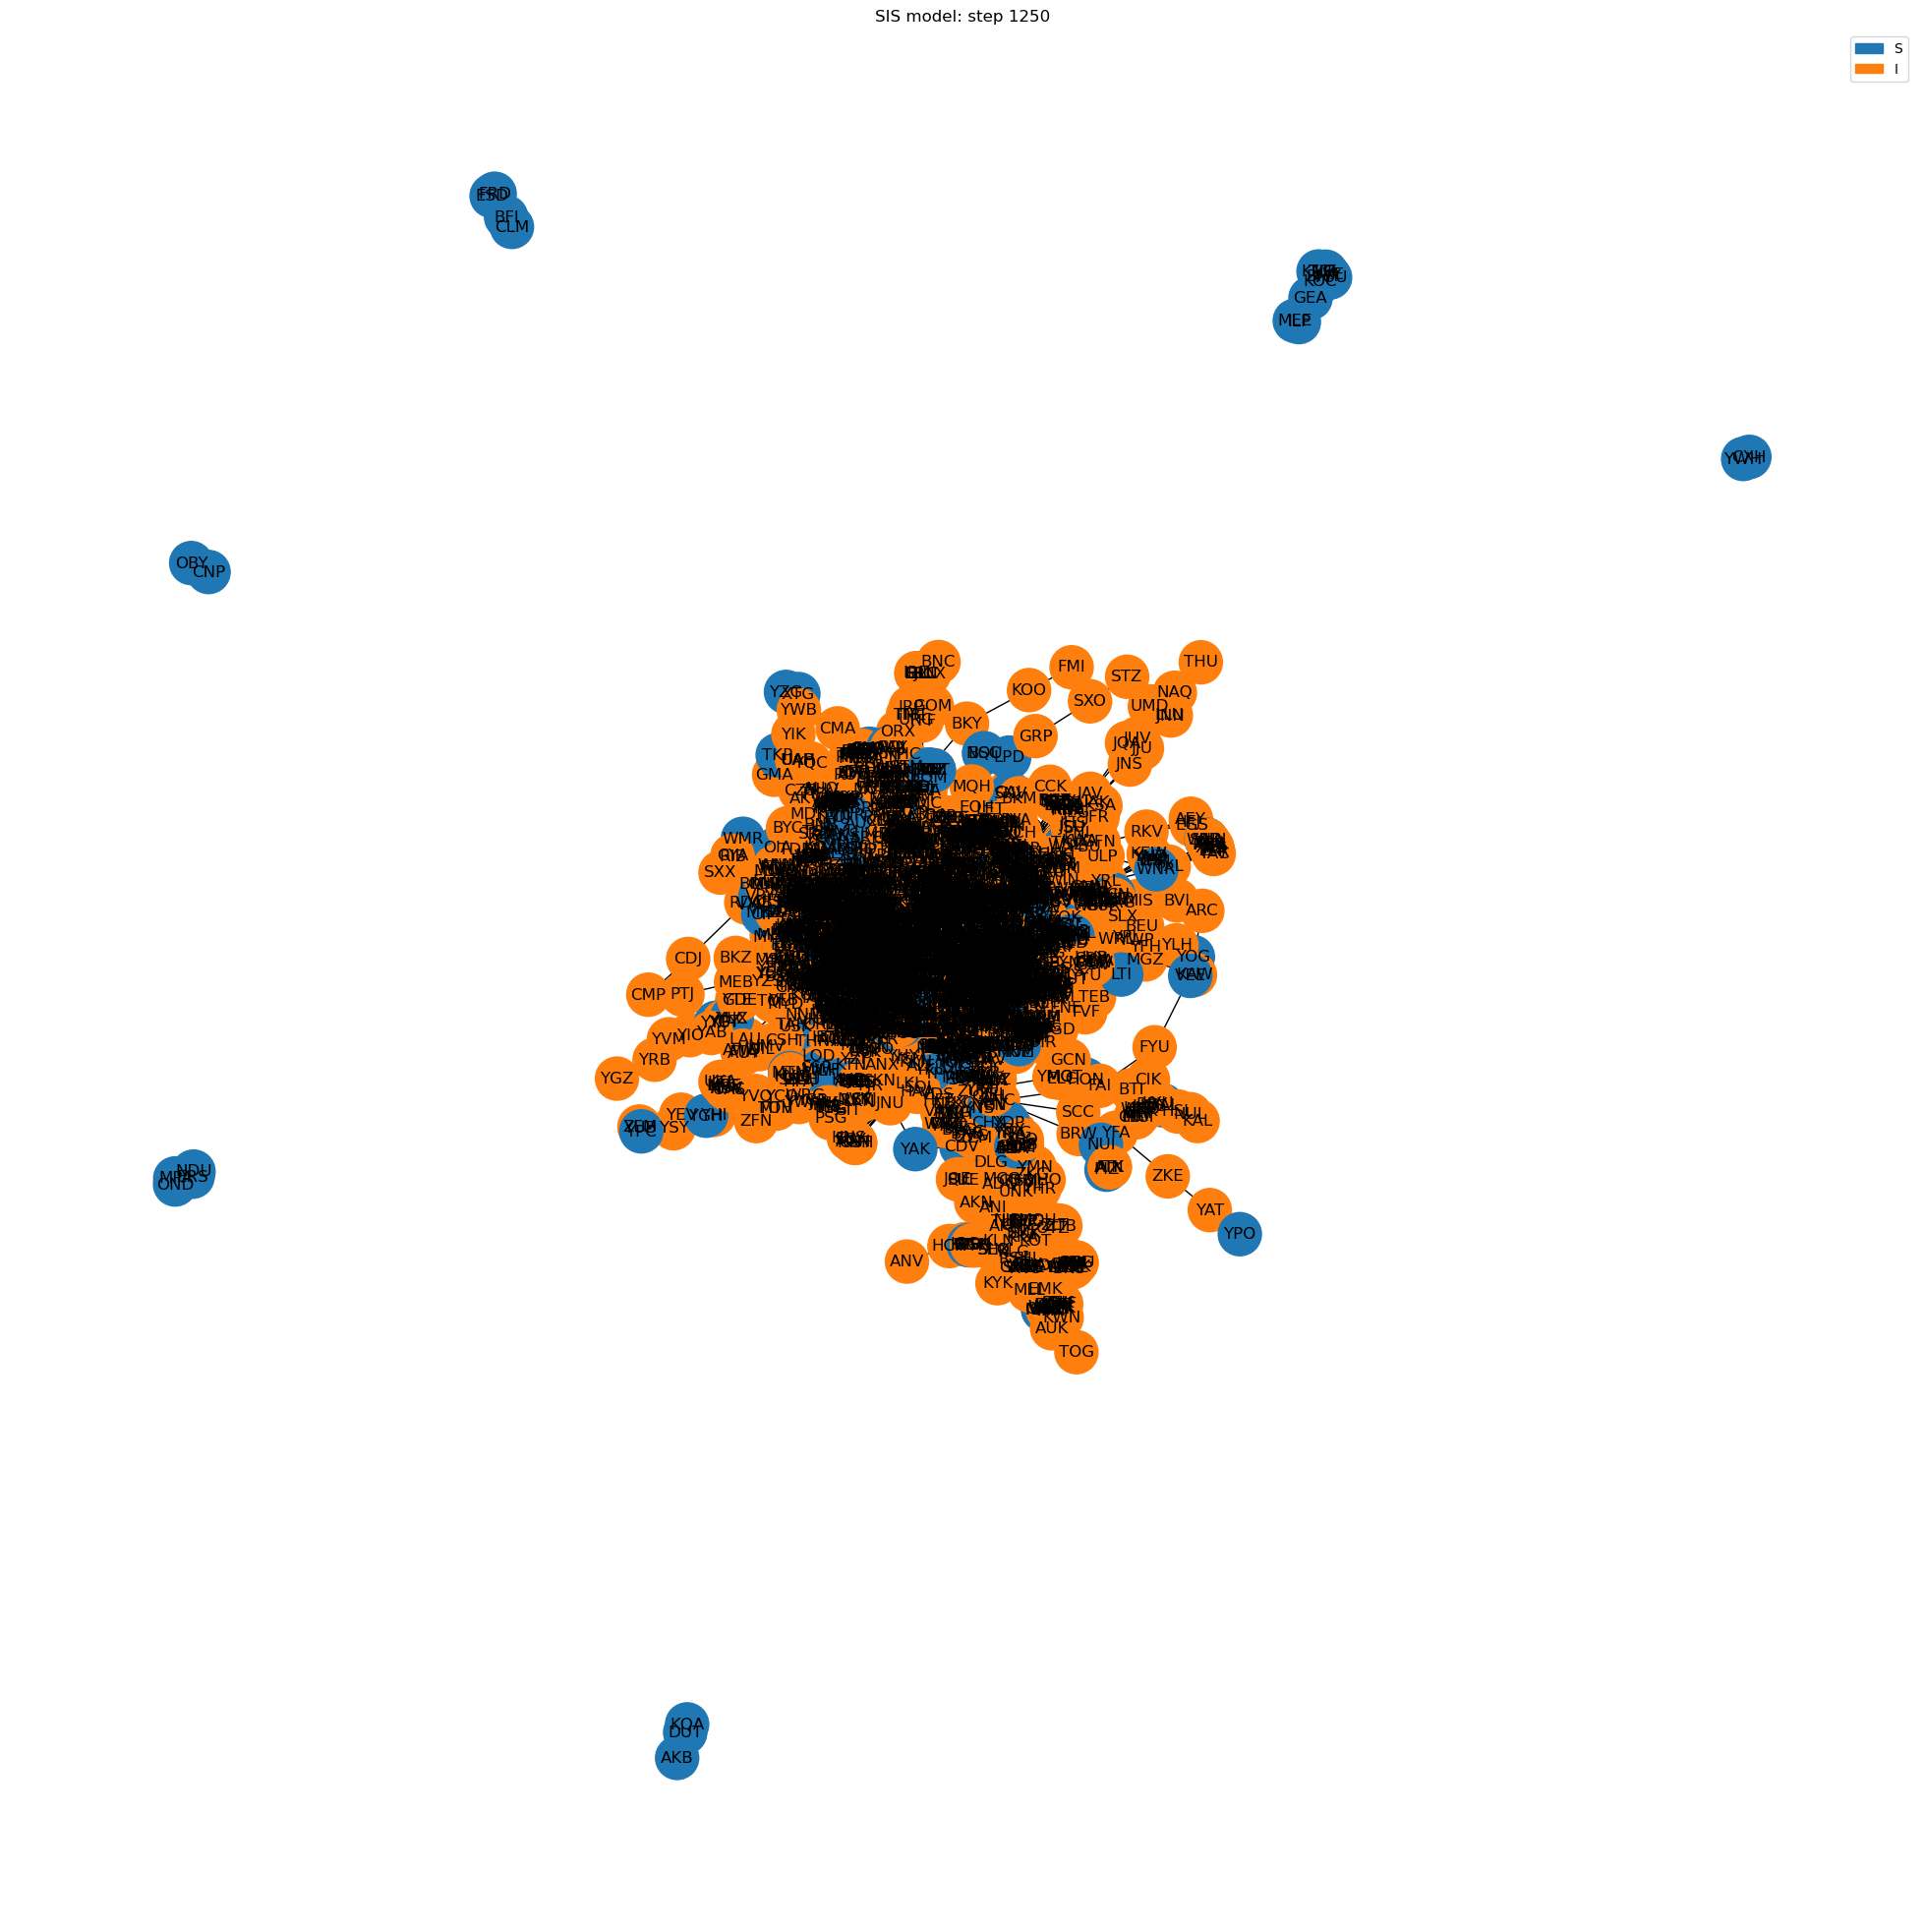

In [73]:
sim.run(1000)
fig, ax = plt.subplots(figsize=(25, 25))
sim.draw(node_size=1000 , with_labels=True)

<AxesSubplot: title={'center': 'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

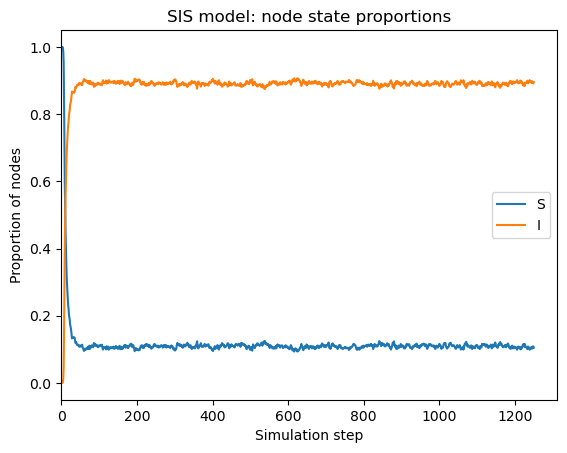

In [74]:
sim.plot()